In [6]:
import pickle
import analysis_config
from online_analysis import util_fcns

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


in task
in task
in task


In [39]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
#### Load models #####
animal = 'grom'
model_set_number = 7; 
dat_cond = pickle.load(open(analysis_config.config[animal+'_pref'] + 'tuning_models_'+animal+'_model_set%d_cond_spec.pkl' %(model_set_number), 'rb'))
dat = pickle.load(open(analysis_config.config[animal+'_pref'] + 'tuning_models_'+animal+'_model_set%d_task_spec_pls_gen.pkl' %(model_set_number), 'rb'))

In [87]:
dat.keys()

[(3, 'np'),
 (8, 'trg'),
 (6, 'vel_tm1'),
 (1, 'hist_1pos_0psh_0spksm_1_spksp_0', 4, 0, 'model'),
 (8, 'pos'),
 (1, 'bin_num'),
 (8, 'hist_1pos_0psh_0spksm_1_spksp_0', 0, 0, 'model'),
 (2, 'hist_1pos_0psh_0spksm_1_spksp_0', 9, 1, 'model'),
 (1, 'hist_1pos_0psh_0spksm_1_spksp_0', 1, 0, 'model'),
 (2, 'hist_1pos_0psh_0spksm_1_spksp_0', 13, 2, 'model'),
 (5, 'hist_1pos_0psh_0spksm_1_spksp_0', 3, 0, 'model'),
 (5, 'pos'),
 (5, 'trg'),
 (3, 'pos_tm1'),
 (8, 'hist_1pos_0psh_0spksm_1_spksp_0'),
 (7, 'hist_1pos_0psh_0spksm_1_spksp_0', 14, 2, 'model'),
 (8, 'hist_1pos_0psh_0spksm_1_spksp_0', 6, 1, 'model'),
 (7, 'hist_1pos_0psh_0spksm_1_spksp_0', 11, 2, 'model'),
 (0, 'hist_1pos_0psh_0spksm_1_spksp_0', 10, 2, 'model'),
 (8, 'hist_1pos_0psh_0spksm_1_spksp_0', 10, 2, 'model'),
 (4, 'pos'),
 ('hist_1pos_0psh_0spksm_1_spksp_0', 'variables'),
 (2, 'pos'),
 (1, 'spks'),
 (0, 'task'),
 (6, 'hist_1pos_0psh_0spksm_1_spksp_0', 0, 0, 'model'),
 (3, 'hist_1pos_0psh_0spksm_1_spksp_0', 13, 2, 'model'),
 (5, 

In [143]:
##### For day, get decoder trials ####
day = 0; 
F, K = util_fcns.get_grom_decoder(day)
dyn_model = 'hist_1pos_0psh_0spksm_1_spksp_0'
model_type = 2; # General model 

spks = dat[day, 'spks']
pred_spks = dat[day, dyn_model][:, :, model_type]
trg = dat[day, 'trg']
tsk = dat[day, 'task']
pos = dat[day, 'pos']
vel = dat[day, 'vel']
trl = dat[day, 'trl']

In [144]:
#### Parse up into trials ####
trl_dat = {}

for i_t in range(2):
    tsk_ix = np.nonzero(tsk == i_t)[0]
    
    for i in np.unique(trl[tsk_ix]):
        trl_ix = np.nonzero(trl[tsk_ix] == i)[0]
        ix_tsk_trl = tsk_ix[trl_ix]
        
        trl_dat[i_t, i] = dict(trg=trg[ix_tsk_trl[0]], tsk = tsk[ix_tsk_trl[0]], pos = pos[ix_tsk_trl, :], 
                          vel = vel[ix_tsk_trl, :], spks = spks[ix_tsk_trl, :], pred_spks = pred_spks[ix_tsk_trl, :])

<IPython.core.display.Javascript object>


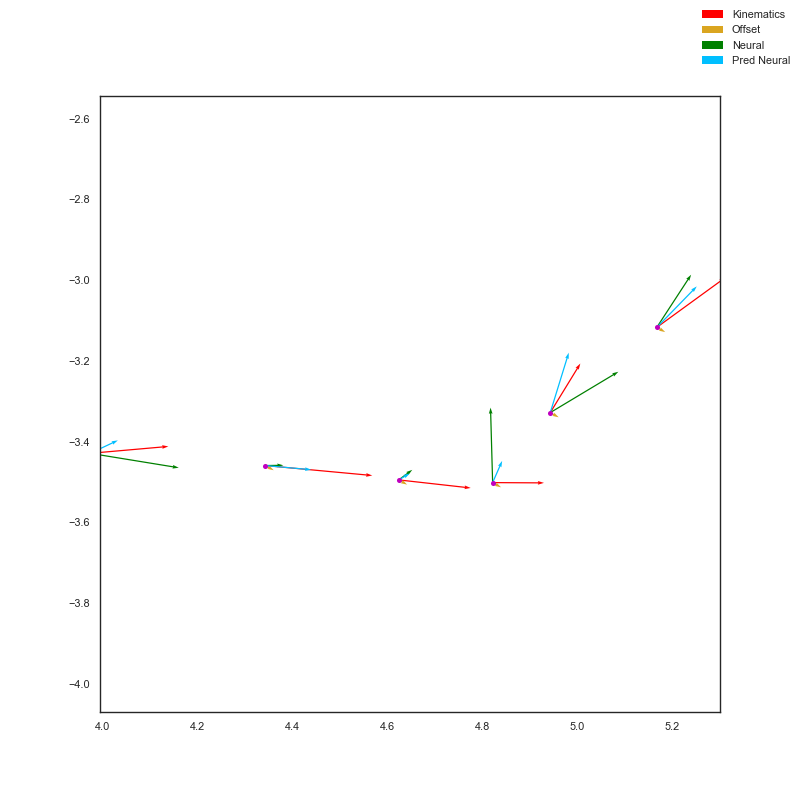

In [211]:
#### Note about grom day 0; 
#### Target 0, 1, 2, 7 not well predicted by dynamics; 
#### Targets 5, 6, are well predicted; 
#### Nice to specify target and index; 
target = 3; 
task = 1; 
trl_index = 3;  


trl_num = get_trl_num(target, task, trl_index, trl, trg, tsk)
plot_trial(trl_dat[task, trl_num], F, K)#, xlim =[-1., 5.], ylim=[-7., -4.])

In [152]:
def plot_trial(trl_data_i, F, K, arrow_scale = 0.002, xlim = None, ylim = None):
    f, ax = plt.subplots(figsize=(10, 10))
    
    ### For each time point plot the position
    pos_tm1 = trl_data_i['pos'][:-1, :]
    int_vel_tm1 = np.dot(F[np.ix_([0, 2], [3, 5])], trl_data_i['vel'][:-1, :].T).T
    
    ### spks_t 
    Kpos = K[[0, 2], :]
    spks_t = trl_data_i['spks'][1:, :]
    pred_spks_t = trl_data_i['pred_spks'][1:, :]
    
    kg_pos = np.dot(Kpos, spks_t.T).T
    kg_pred_pos = np.dot(Kpos, pred_spks_t.T).T
    
    ### offset; 
    pos_offset = F[[0, 2], -1]
    
    
    ### Plot each point; 
    tm1 = pos_tm1.shape[0]
    
    ### plot position; 
    ax.plot(pos_tm1[:, 0], pos_tm1[:, 1], 'm.')
    

    ### Velocity / Kinematics ###
    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], int_vel_tm1[:, 0], int_vel_tm1[:, 1], 
             width=arrow_scale, color='r', angles='xy', scale=1, scale_units='xy', 
              label = 'Kinematics')

    ### Offset ###

    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], pos_offset[0], pos_offset[1], 
             width=arrow_scale, color = 'goldenrod', angles='xy', scale=1, scale_units='xy', 
              label = 'Offset')

    ### True Neural ###
    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], kg_pos[:, 0], kg_pos[:, 1], 
             width=arrow_scale, color = 'g', angles='xy', scale=1, scale_units='xy',
             label = 'Neural')
    
    ### Dynamics Neural ###
    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], kg_pred_pos[:, 0], kg_pred_pos[:, 1], 
             width=arrow_scale, color = 'deepskyblue', angles='xy', scale=1, scale_units='xy',
             label = 'Pred Neural')
    
    ### Sum ###
#     sum_arr = int_vel_tm1[:, :] + pos_offset[np.newaxis, :] + kg_pos[:, :]

#     ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], sum_arr[:, 0], sum_arr[:, 1], 
#              width=arrow_scale, color = 'k', angles='xy', scale=1, scale_units='xy',
#              label = 'Sum')    
        
    if xlim is None: 
        pass
    else:
        ax.set_xlim(xlim)
    if ylim is None:
        pass
    else:
        ax.set_ylim(ylim)
    f.legend()
        
    

In [112]:
def get_trl_num(target, task, trl_index, trl, trg, tsk):
    
    ### Get the correct trial number; 
    ix = np.nonzero(np.logical_and(trg == target, tsk == task))[0]
    trials = np.unique(trl[ix])
    
    if len(trials) <= trl_index:
        return trials[-1]
    else:
        return trials[trl_index]